Plotting hieght traces and finding ways of automatically finding DNA damage.

The aim of this notebook is to create a plotting pipeline for DNA height traces and find robust ways of highlight DNA damage.

In [10]:
## installing packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statistics as stats
import json
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import random

## All new packages as needed to be installed here!

In [11]:
## importing the height trace file which is a .json file.

with open('/Users/t/Documents/pIC0z/20240112_pIC0z_rel/pIC0z_rel_single_molecules/output_height_trace_branch/height_stats.json') as f:
    df = json.load(f)

print(df)

print(type(df))

image_dict = df["/Users/t/Documents/pIC0z/20240112_pIC0z_rel/pIC0z_rel_single_molecules/20240112_200nm_6ng_pIC0z_notel_topo70_Mg_Ni.0_00020"]
print()
print(image_dict)

mol_dict = image_dict['0']
print()
print(mol_dict)

## here the values for height and distance have been applied.

heights, distances = mol_dict
print(heights)
print(distances)

{'/Users/t/Documents/pIC0z/20240112_pIC0z_rel/pIC0z_rel_single_molecules/20240112_200nm_6ng_pIC0z_notel_topo70_Mg_Ni.0_00008': {'0': [[2.3734986532448195e-09, 2.5303747618259503e-09, 2.542343417403232e-09, 2.5650268019298368e-09, 2.590349611271605e-09, 2.6089911382133935e-09, 2.615980929444939e-09, 2.610534808302998e-09, 2.531863911066041e-09, 2.5026166760983196e-09, 2.5398496488142994e-09, 2.5183441818855713e-09, 2.5086881509436706e-09, 2.51901262083493e-09, 2.5279171746674656e-09, 2.4846606979312393e-09, 2.494420630865343e-09, 2.5002477607937396e-09, 2.4997010364419455e-09, 2.4980963034533926e-09, 2.5096729990948156e-09, 2.5463231108648706e-09, 2.6044499988635746e-09, 2.665201163886693e-09, 2.7078261067324314e-09, 2.721947228069901e-09, 2.7094175389325016e-09, 2.681805213702919e-09, 2.647846358264744e-09, 2.6294034799154942e-09, 2.6353306135164352e-09, 2.6642009731314807e-09, 2.702911953985759e-09, 2.7325619917032483e-09, 2.7394837715122456e-09, 2.7229100478486878e-09, 2.693330014344

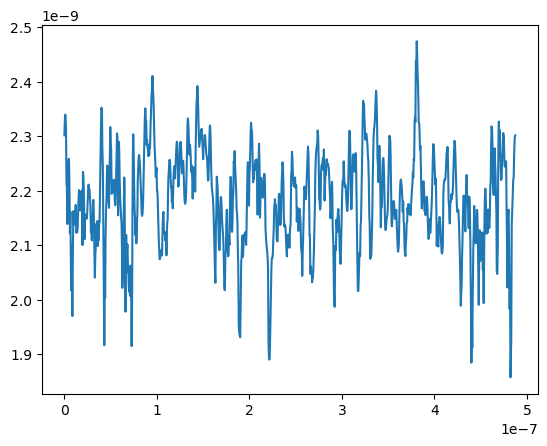

In [12]:
## having a quick look at the 'raw' height trace plot

plt.plot(distances, heights)

## neverything is in meters - this will need to be changed to nanometers. 
## the size/sccaling of the graph is not great, it is very compact.
## 

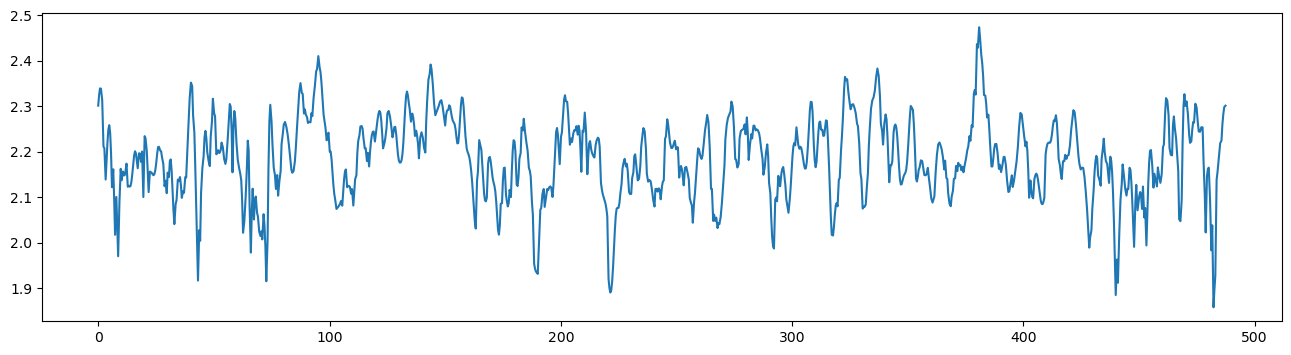

In [13]:
## the data has been scaled to nanometers which is easier to interpret and the scale of the graph has been lengthened to decompress the data.
## I have also forced the height and distance variables in numpy arrays for ease going forward...

heights_in_nm = []
for i in heights:
    heights_in_nm.append(i * 1E9)
    
heights_in_nm = np.array(heights_in_nm)

distances_in_nm = []
for i in distances:
    distances_in_nm.append(i * 1E9)

distances_in_nm = np.array(distances_in_nm)

plt.figure(figsize=(16,4))
plt.plot(distances_in_nm, heights_in_nm)

2.183634446303474


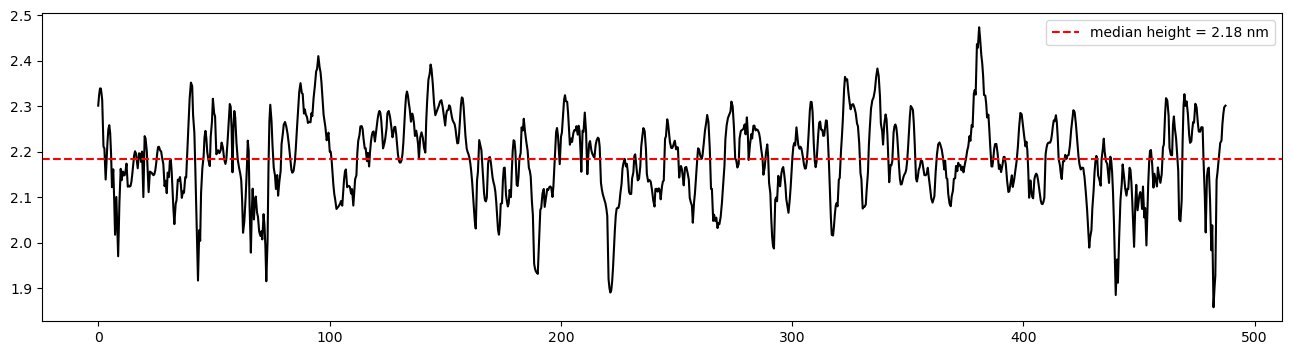

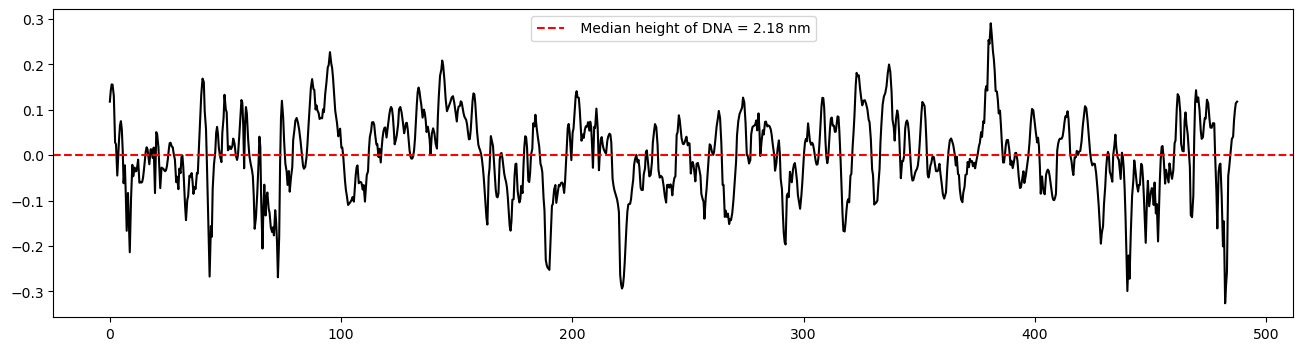

In [14]:
## I want to show the change in height from the median (median as the data is not normally distributed). 
## Need to calculate the median and subtract it from all poitns to make the median 'effectively' zero.

print(stats.median(heights_in_nm))

## plots the nanometer adjusted heights with a median line.

plt.figure(figsize=(16,4))
plt.plot(distances_in_nm, heights_in_nm, color = "black")
plt.axhline(stats.median(heights_in_nm), color = "red", linestyle = "dashed", label = f"median height = {stats.median(heights_in_nm):.2f} nm")
plt.legend()

## creates a new array of the heights with the median subtracted.
med_adj_heights = []
for i in heights_in_nm:
    med_adj_heights.append(i - stats.median(heights_in_nm))

med_adj_heights = np.array(med_adj_heights)

## plots the graph of median adjusted height values.

plt.figure(figsize=(16,4))
plt.plot(distances_in_nm, med_adj_heights, color = "black")
plt.axhline(stats.median(med_adj_heights), color = "red", linestyle = "dashed", label = f" Median height of DNA = {stats.median(heights_in_nm):.2f} nm")
plt.legend(loc = "upper center")

(-10.0, 497.35412126804556)

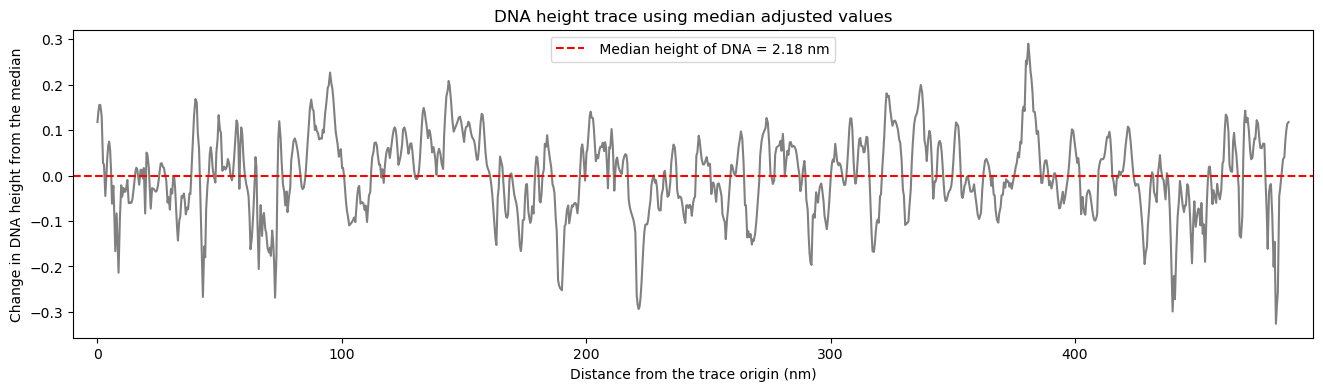

In [15]:
## add the proper labels you greb.

plt.figure(figsize=(16,4))
plt.plot(distances_in_nm, med_adj_heights, color = "grey")
plt.axhline(stats.median(med_adj_heights), color = "red", linestyle = "dashed", label = f" Median height of DNA = {stats.median(heights_in_nm):.2f} nm")
plt.legend(loc = "upper center")
plt.title("DNA height trace using median adjusted values")
plt.xlabel("Distance from the trace origin (nm)")
plt.ylabel("Change in DNA height from the median")
plt.xlim(min(distances_in_nm)-10, max(distances_in_nm)+10)

Text(0, 0.5, 'Change in DNA height from the median')

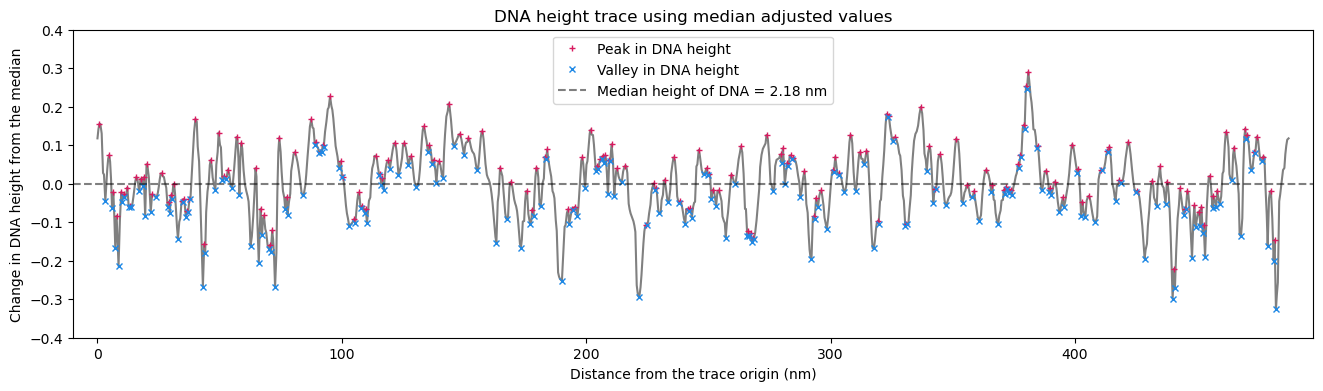

In [16]:
## I want to find the peaks and valleys of the height trace to make measurements from.

## find peaks.
peaks, _  = find_peaks(med_adj_heights)

## find valleys.
valleys, _ = find_peaks(-med_adj_heights)

plt.figure(figsize=(16,4))
plt.plot(distances_in_nm, med_adj_heights, color = "grey")
plt.plot(distances_in_nm[peaks], med_adj_heights[peaks], "+", color = "#D81B60", markersize = 4, label = "Peak in DNA height")
plt.plot(distances_in_nm[valleys], med_adj_heights[valleys], "x", color = "#1E88E5", markersize = 4, label = "Valley in DNA height")
plt.axhline(stats.median(med_adj_heights), color = "black", alpha = 0.5, linestyle = "dashed", label = f"Median height of DNA = {stats.median(heights_in_nm):.2f} nm")
plt.legend(loc = "upper center")
plt.xlim(min(distances_in_nm)-10, max(distances_in_nm)+10)
plt.ylim(-0.4,0.4)
#plt.axvline(80, color = "#FFC107", linestyle = "dotted") # sectioning graph - line 1
#plt.axvline(120, color = "#FFC107", linestyle = "dotted") # sectioning graph - line 2
plt.title("DNA height trace using median adjusted values")
plt.xlabel("Distance from the trace origin (nm)")
plt.ylabel("Change in DNA height from the median")


<class 'numpy.ndarray'>
177
[9, 4, 3, 4, 2, 4, 2, 7, 4, 3, 2, 5, 10, 6, 2, 3, 7, 2, 3, 2, 5, 8, 6, 7, 5, 3, 7, 5, 12, 5, 3, 5, 2, 7, 6, 7, 13, 4, 4, 2, 6, 10, 2, 11, 5, 3, 3, 9, 4, 2, 6, 6, 9, 6, 13, 5, 4, 5, 8, 9, 7, 14, 18, 11, 16, 5, 4, 8, 2, 18, 3, 3, 7, 8, 6, 3, 2, 2, 4, 2, 5, 7, 21, 7, 2, 8, 7, 5, 6, 2, 8, 8, 2, 4, 5, 11, 8, 6, 2, 2, 11, 11, 2, 4, 3, 2, 9, 9, 2, 5, 11, 2, 4, 11, 10, 6, 11, 8, 2, 5, 9, 12, 7, 5, 5, 17, 10, 6, 10, 5, 10, 2, 2, 2, 6, 2, 3, 2, 2, 9, 8, 3, 4, 6, 7, 5, 4, 6, 13, 6, 2, 9, 7, 7, 13, 7, 6, 7, 5, 4, 2, 7, 4, 3, 2, 6, 3, 3, 7, 7, 10, 2, 6, 2, 5, 7, 3]


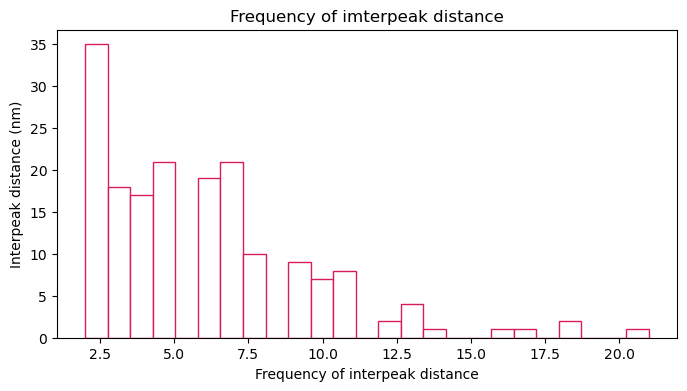

<class 'numpy.ndarray'>
177
[7, 3, 3, 3, 2, 4, 2, 9, 3, 2, 5, 5, 11, 2, 2, 6, 4, 3, 2, 2, 11, 2, 9, 6, 3, 5, 7, 10, 7, 3, 6, 2, 4, 9, 2, 12, 10, 4, 2, 2, 13, 3, 7, 6, 5, 4, 2, 11, 2, 2, 6, 9, 8, 8, 12, 4, 4, 5, 9, 8, 13, 20, 10, 14, 9, 3, 7, 5, 14, 6, 3, 4, 8, 10, 2, 3, 2, 4, 2, 3, 7, 16, 9, 7, 4, 7, 9, 5, 3, 3, 11, 4, 3, 5, 8, 8, 10, 2, 2, 2, 15, 7, 3, 3, 3, 7, 10, 3, 3, 8, 7, 4, 6, 11, 8, 10, 5, 8, 4, 10, 2, 16, 6, 2, 10, 17, 8, 6, 10, 6, 6, 2, 2, 2, 6, 2, 3, 2, 9, 5, 6, 2, 6, 4, 10, 4, 4, 10, 7, 6, 7, 4, 12, 7, 11, 8, 7, 2, 7, 2, 6, 3, 5, 2, 2, 7, 3, 3, 10, 8, 5, 4, 4, 5, 5, 5, 2]


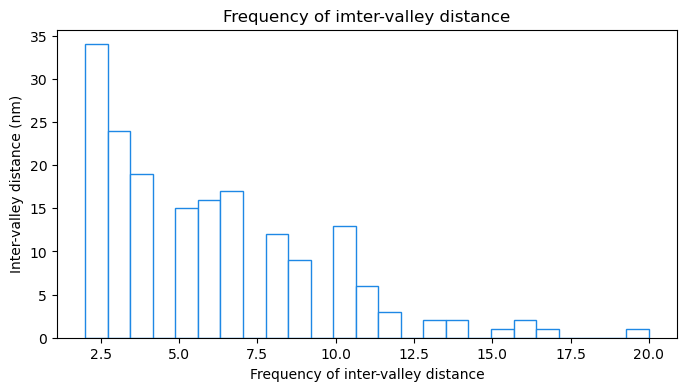

In [17]:
inter_peak_distance = []
for peak in range(len(peaks) - 1):
    difference = peaks[peak + 1] - peaks[peak]
    inter_peak_distance.append(difference)

print(type(peaks))
print(len(inter_peak_distance))
print(inter_peak_distance)

plt.figure(figsize = (8,4))
plt.hist(inter_peak_distance, bins = 25, color = "white", edgecolor = "#D81B60")
plt.xlabel("Frequency of interpeak distance")
plt.ylabel("Interpeak distance (nm)")
plt.title("Frequency of imterpeak distance")
plt.show()

inter_valley_distance = []
for valley in range(len(valleys) - 1):
    difference = valleys[valley + 1] - valleys[valley]
    inter_valley_distance.append(difference)

print(type(valleys))
print(len(inter_valley_distance))
print(inter_valley_distance)

plt.figure(figsize = (8,4))
plt.hist(inter_valley_distance, bins = 25, color = "white", edgecolor = "#1E88E5")
plt.xlabel("Frequency of inter-valley distance")
plt.ylabel("Inter-valley distance (nm)")
plt.title("Frequency of imter-valley distance")
plt.show()

Text(0, 0.5, 'Change in DNA height from the median')

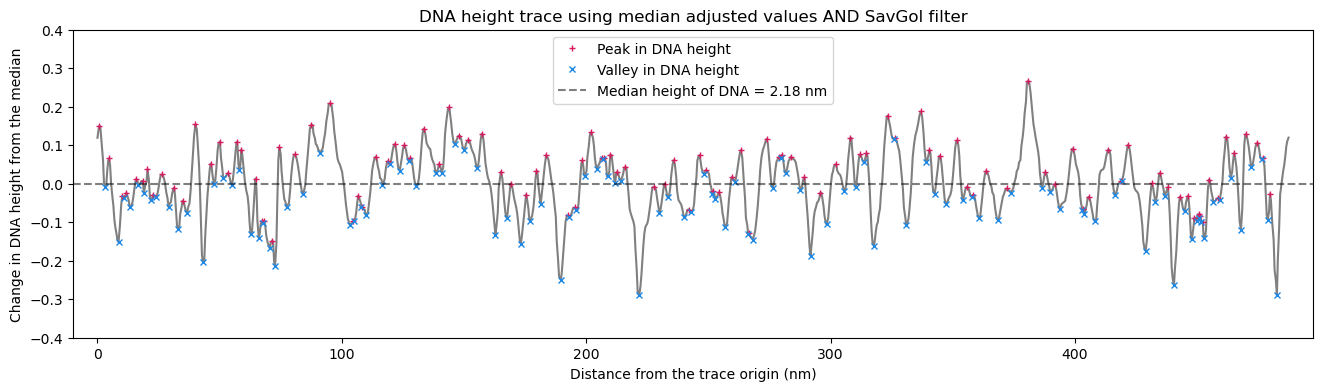

In [18]:
## if you apply a savgol filter on the data it smoothens the data. You can chose a) the window length of the smoothening and b) the polynominal fit used to fit the data.
## i'm not sure if using the filter is actually useful... I have set the window length to 3 as the distance of major groove to major groove is 3.4 nm then rounded down.

## savgol median adjusted heights
savgol_med_adj_heights = savgol_filter(med_adj_heights, 3, 1)

## find peaks with savgol filter
savgol_peaks, _  = find_peaks(savgol_filter(med_adj_heights, 3, 1))

## find valleys with savgol filter
savgol_valleys, _ = find_peaks(savgol_filter((-med_adj_heights), 3, 1))

plt.figure(figsize=(16,4))
plt.plot(distances_in_nm, savgol_filter(med_adj_heights, 3, 1), color = "grey")
plt.plot(distances_in_nm[savgol_peaks], savgol_med_adj_heights[savgol_peaks], "+", color = "#D81B60", markersize = 4, label = "Peak in DNA height")
plt.plot(distances_in_nm[savgol_valleys], savgol_med_adj_heights[savgol_valleys], "x", color = "#1E88E5", markersize = 4, label = "Valley in DNA height")
plt.axhline(stats.median(med_adj_heights), color = "black", alpha = 0.5, linestyle = "dashed", label = f"Median height of DNA = {stats.median(heights_in_nm):.2f} nm")
plt.legend(loc = "upper center")
plt.xlim(min(distances_in_nm)-10, max(distances_in_nm)+10)
plt.ylim(-0.4,0.4)
highlight_box = patches.Rectangle((80, 120), 0.4, -0.4, linewidth=1, edgecolor='pink', facecolor='lightpink', alpha=0.5)
#ax.add_patch(highlight_box)
#plt.axvline(80, color = "#FFC107", linestyle = "dotted") # sectioning graph - line 1
#plt.axvline(120, color = "#FFC107", linestyle = "dotted") # sectioning graph - line 2
#plt.xlim (75, 125)
#plt.legend(loc = "lower left")
plt.title("DNA height trace using median adjusted values AND SavGol filter")
plt.xlabel("Distance from the trace origin (nm)")
plt.ylabel("Change in DNA height from the median")

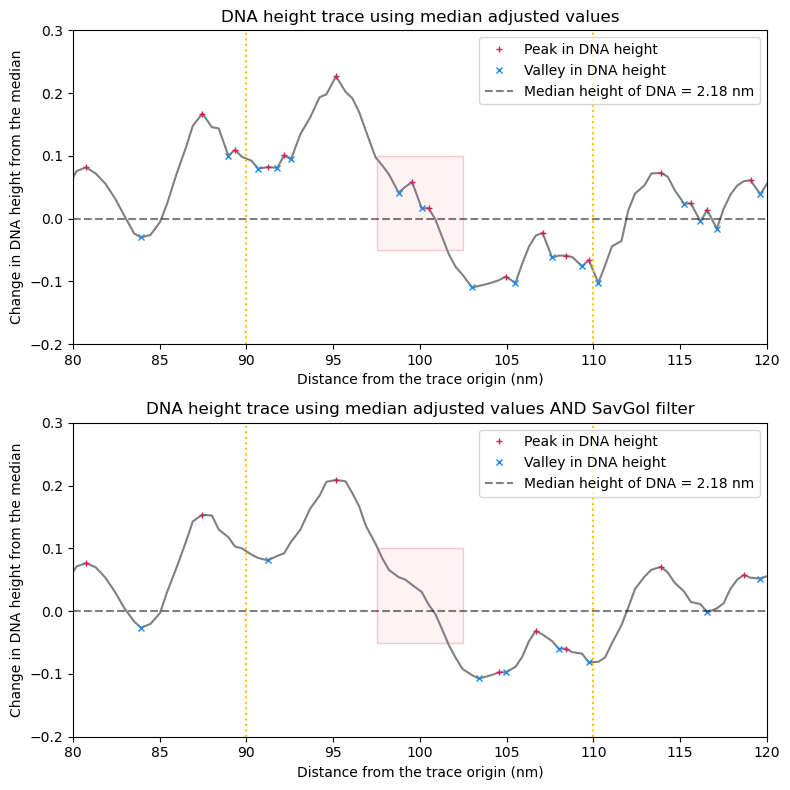

In [19]:
# Create a figure and subplots grid with 2 rows
fig, axs = plt.subplots(2, figsize=(8, 8))

# Plot data on the first subplot (axs[0])
axs[0].plot(distances_in_nm, med_adj_heights, color="grey")
axs[0].plot(distances_in_nm[peaks], med_adj_heights[peaks], "+", color="#D81B60", markersize=4, label="Peak in DNA height")
axs[0].plot(distances_in_nm[valleys], med_adj_heights[valleys], "x", color="#1E88E5", markersize=4, label="Valley in DNA height")
axs[0].axhline(stats.median(med_adj_heights), color="black", alpha=0.5, linestyle="dashed", label=f"Median height of DNA = {stats.median(heights_in_nm):.2f} nm")
#axs[0].legend(loc="lower center")
axs[0].set_xlim(min(distances_in_nm) - 10, max(distances_in_nm) + 10)
axs[0].set_ylim(-0.2, 0.3)
axs[0].axvline(90, color="#FFC107", linestyle="dotted")
axs[0].axvline(110, color="#FFC107", linestyle="dotted")
axs[0].set_xlim(80, 120)
axs[0].set_title("DNA height trace using median adjusted values")
axs[0].set_xlabel("Distance from the trace origin (nm)")
axs[0].set_ylabel("Change in DNA height from the median")
#highlight_box = patches.Rectangle((90, -0.2), 20, 0.5, linewidth=1, facecolor='#FFC107', alpha=0.2)
#axs[0].add_patch(highlight_box)
highlight_box_2 = patches.Rectangle((97.5, -0.05), 5, 0.15, linewidth = 1, edgecolor = "red", facecolor = "pink", alpha=0.2)
axs[0].add_patch(highlight_box_2)
axs[0].legend(loc="upper right")
# Plot data on the second subplot (axs[1])
axs[1].plot(distances_in_nm, savgol_filter(med_adj_heights, 3, 1), color="grey")
axs[1].plot(distances_in_nm[savgol_peaks], savgol_med_adj_heights[savgol_peaks], "+", color="#D81B60", markersize=4, label="Peak in DNA height")
axs[1].plot(distances_in_nm[savgol_valleys], savgol_med_adj_heights[savgol_valleys], "x", color="#1E88E5", markersize=4, label="Valley in DNA height")
axs[1].axhline(stats.median(med_adj_heights), color="black", alpha=0.5, linestyle="dashed", label=f"Median height of DNA = {stats.median(heights_in_nm):.2f} nm")
axs[1].set_xlim(min(distances_in_nm) - 10, max(distances_in_nm) + 10)
axs[1].set_ylim(-0.2, 0.3)
axs[1].axvline(90, color="#FFC107", linestyle="dotted")
axs[1].axvline(110, color="#FFC107", linestyle="dotted")
axs[1].set_xlim(80, 120)
axs[1].legend(loc="upper right")
axs[1].set_title("DNA height trace using median adjusted values AND SavGol filter")
axs[1].set_xlabel("Distance from the trace origin (nm)")
axs[1].set_ylabel("Change in DNA height from the median")
#highlight_box = patches.Rectangle((90, -0.2), 20, 0.5, linewidth=1, facecolor='#FFC107', alpha=0.2)
#axs[1].add_patch(highlight_box)
highlight_box_2 = patches.Rectangle((97.5, -0.05), 5, 0.15, linewidth = 1, edgecolor = "red", facecolor = "pink", alpha=0.2)
axs[1].add_patch(highlight_box_2)

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()



In [20]:
print(type(peaks))
print(len(peaks))

print(type(valleys))
print(len(valleys))

<class 'numpy.ndarray'>
178
<class 'numpy.ndarray'>
178


In [21]:
print(peaks[0])
print(valleys[0])

print(distances_in_nm[(peaks[0])])
print(heights_in_nm[(peaks[0])])

'''
You use the index of the array to find the location of the data in the heights and distances arrays!
'''

print(len(peaks))
print(peaks)

print(len(valleys))
print(valleys)

## will the length of the peaks and valley arrays alway be equal?

## assuming len(peaks) and len(valleys) are already calculated

if len(peaks) == len(valleys):
    print("Is the length of the peak array equal to the length of the valley array? Yes")
else:
    print("Is the length of the peak array equal to the length of the valley array? No)")


2
7
0.7812500000000001
2.339392049859078
178
[   2   11   15   18   22   24   28   30   37   41   44   46   51   61
   67   69   72   79   81   84   86   91   99  105  112  117  120  127
  132  144  149  152  157  159  166  172  179  192  196  200  202  208
  218  220  231  236  239  242  251  255  257  263  269  278  284  297
  302  306  311  319  328  335  349  367  378  394  399  403  411  413
  431  434  437  444  452  458  461  463  465  469  471  476  483  504
  511  513  521  528  533  539  541  549  557  559  563  568  579  587
  593  595  597  608  619  621  625  628  630  639  648  650  655  666
  668  672  683  693  699  710  718  720  725  734  746  753  758  763
  780  790  796  806  811  821  823  825  827  833  835  838  840  842
  851  859  862  866  872  879  884  888  894  907  913  915  924  931
  938  951  958  964  971  976  980  982  989  993  996  998 1004 1007
 1010 1017 1024 1034 1036 1042 1044 1049 1056 1059]
178
[   7   14   17   20   23   25   29   31   40  

218
226
-8
2.241885383556974
2.200382761478299
0.041502622078675167


(90.0, 110.0)

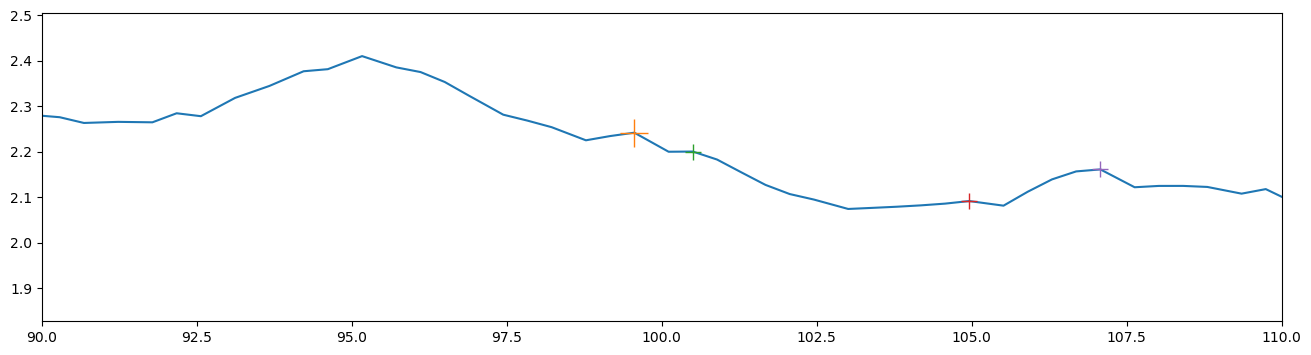

In [22]:
## finding the difference in height between a peak and adjacent valley. Lets use peak 42 as the answer to life, the universe and everything...

print(peaks[42]) # peak
print(valleys[42+1]) # adjacent valley
print(peaks[42] - valleys[42+1])

## These the distance values you moron, you needs the height values.

print(heights_in_nm[peaks[42]])
print(heights_in_nm[peaks[42+1]])
print(heights_in_nm[peaks[42]] - heights_in_nm[peaks[42+1]])

plt.figure(figsize = (16,4))
plt.plot(distances_in_nm, heights_in_nm)
plt.plot(distances_in_nm[peaks[42]],heights_in_nm[peaks[42]], "+",  markersize = 20)
plt.plot(distances_in_nm[peaks[43]],heights_in_nm[peaks[43]], "+",  markersize = 12)
plt.plot(distances_in_nm[peaks[44]],heights_in_nm[peaks[44]], "+",  markersize = 12)
plt.plot(distances_in_nm[peaks[45]],heights_in_nm[peaks[45]], "+",  markersize = 12)
plt.xlim(90,110)

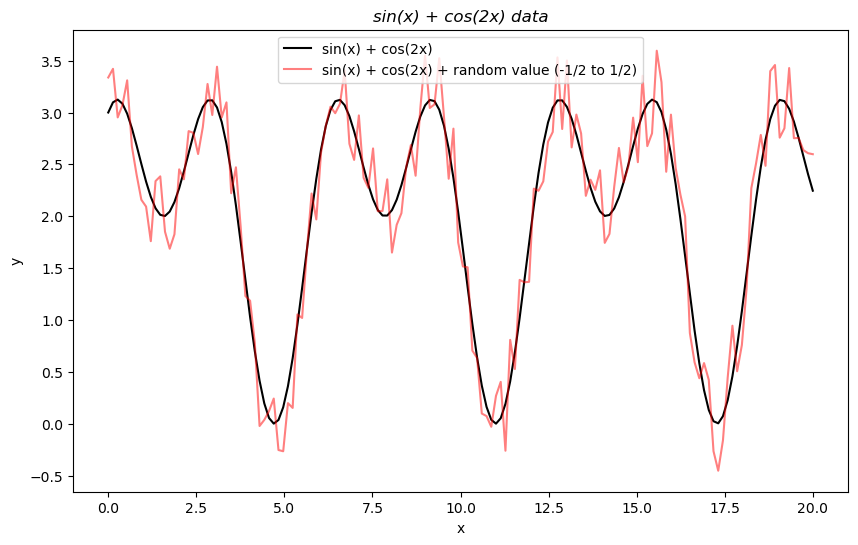

0.31919323108498476


In [23]:
# Generate x values
x = np.linspace(0, 20, 150)

# Generate y values for fake height trace (sine and cosine addition)
y = np.sin(x) + np.cos(2*x)

random_for_y = np.random.uniform(-1/2, 1/2, len(y))
random_y = y + random_for_y
#random_for_x = np.random.uniform(1/10, 1, len(x))
#random_x = x+ random_for_x

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, 2 + y,  color = 'black', label = 'sin(x) + cos(2x)')
plt.plot(x, 2 + random_y, color = 'red', alpha = 0.5, label = 'sin(x) + cos(2x) + random value (-1/2 to 1/2)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x) + cos(2x) data', style = 'oblique')
plt.legend(loc = 'upper center')
plt.show()

print(stats.median(y))

Text(0.5, 0, 'Distance from trace origin (nm)')

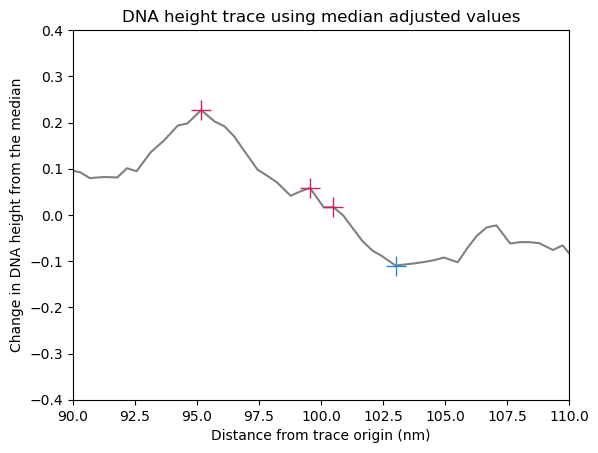

In [24]:
## This is the same as the double plot above with the labelling boxes removed. I want to try and find differences between the heights of the peaks and valleys.

plt.plot(distances_in_nm, med_adj_heights, color = "grey")
plt.plot(distances_in_nm[peaks[41:44]], med_adj_heights[peaks[41:44]], "+", color="#D81B60", markersize = 14)
plt.plot(distances_in_nm[valleys[43]], med_adj_heights[valleys[43]], "+", color="#1E88E5", markersize = 14)
#plt.plot(distances_in_nm[peaks], med_adj_heights[peaks], "+", color="#D81B60", markersize=8, label="Peak in DNA height")
#plt.plot(distances_in_nm[valleys], med_adj_heights[valleys], "x", color="#1E88E5", markersize=8, label="Valley in DNA height")
#plt.axhline(stats.median(med_adj_heights), color="black", alpha=0.5, linestyle="dashed", label=f"Median height of DNA = {stats.median(heights_in_nm):.2f} nm")
#axs[0].legend(loc="lower center")
plt.xlim(min(distances_in_nm) - 10, max(distances_in_nm) + 10)
plt.ylim(-0.4, 0.4)
#plt.axvline(80, color="#FFC107", linestyle="dotted")
#plt.axvline(120, color="#FFC107", linestyle="dotted")
plt.xlim(90, 110)
plt.title("DNA height trace using median adjusted values")
plt.ylabel("Change in DNA height from the median")
plt.xlabel("Distance from trace origin (nm)")
#highlight_box = patches.Rectangle((90, -0.2), 20, 0.5, linewidth=1, facecolor='#FFC107', alpha=0.2)
#plt.gca().add_patch(highlight_box)
#highlight_box_2 = patches.Rectangle((97.5, -0.05), 5, 0.15, linewidth = 1, edgecolor = "red", facecolor = "pink", alpha=0.2)
#plt.gca().add_patch(highlight_box_2)

The heights of the peaks of interest are: [0.22680601 0.05825094 0.01674832]
The height of the valley of interest is: -0.10962098682391863
[0.336427   0.16787192 0.1263693 ]
[-0.10962099 -0.10962099 -0.10962099]
100.49969555217933
103.00524772498133


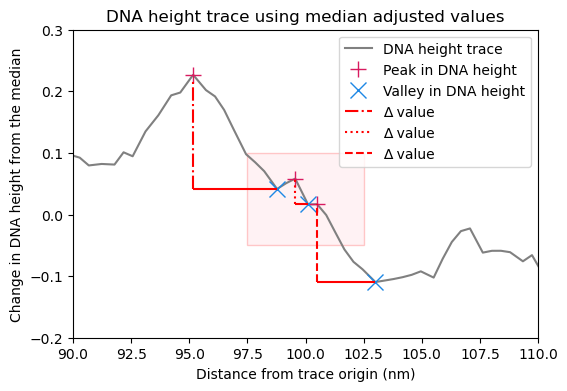

In [25]:
print("The heights of the peaks of interest are:", (med_adj_heights[peaks[41:44]]))
print("The height of the valley of interest is:", (med_adj_heights[valleys[43]]))

diff_peaks_valleys = np.array((med_adj_heights[peaks[41:44]] - (med_adj_heights[valleys[43]])))
print(diff_peaks_valleys)

print(med_adj_heights[peaks[41:44]] - np.absolute(diff_peaks_valleys))

print(distances_in_nm[peaks[43]])
print(distances_in_nm[valleys[43]])

plt.figure(figsize = (6,4))
plt.plot(distances_in_nm, med_adj_heights, color = "grey", label = "DNA height trace")
#plt.plot(distances_in_nm[peaks[41:44]], (med_adj_heights[peaks[41:44]] - diff_peaks_valleys))
plt.plot(distances_in_nm[peaks[41:44]], med_adj_heights[peaks[41:44]], "+", color = "#D81B60", markersize = 12, label = "Peak in DNA height")
plt.plot(distances_in_nm[valleys[41:44]], med_adj_heights[valleys[41:44]], "x", color = "#1E88E5", markersize = 12, label = "Valley in DNA height")
#plt.xlim(min(distances_in_nm) - 10, max(distances_in_nm) + 10)
plt.ylim(-0.2, 0.3)
plt.xlim(90, 110)

plt.title("DNA height trace using median adjusted values")
plt.ylabel("Change in DNA height from the median")
plt.xlabel("Distance from trace origin (nm)")

plt.vlines(95.164, med_adj_heights[valleys[41]], 0.22, color = "red", linestyle = "-.", alpha = 1.0, label = "∆ value")
plt.hlines(med_adj_heights[valleys[41]], distances_in_nm[peaks[41]], distances_in_nm[valleys[41]], color = "red", linestyle = "-", alpha = 1.0)

plt.vlines(99.55, med_adj_heights[valleys[42]], 0.058, color = "red", linestyle = ":", alpha = 1.0, label = "∆ value")
plt.hlines(med_adj_heights[valleys[42]], distances_in_nm[peaks[42]], distances_in_nm[valleys[42]], color = "red", linestyle = "-", alpha = 1.0)

plt.vlines(100.49, med_adj_heights[valleys[43]], 0.0167, color = "red", linestyle = "--", alpha = 1.0, label = "∆ value")
plt.hlines(med_adj_heights[valleys[43]], distances_in_nm[peaks[43]], distances_in_nm[valleys[43]], color = "red", linestyle = "-", alpha = 1.0)

highlight_box_2 = patches.Rectangle((97.5, -0.05), 5, 0.15, linewidth = 1, edgecolor = "red", facecolor = "pink", alpha=0.2)
plt.gca().add_patch(highlight_box_2)

plt.legend(loc = "upper right")


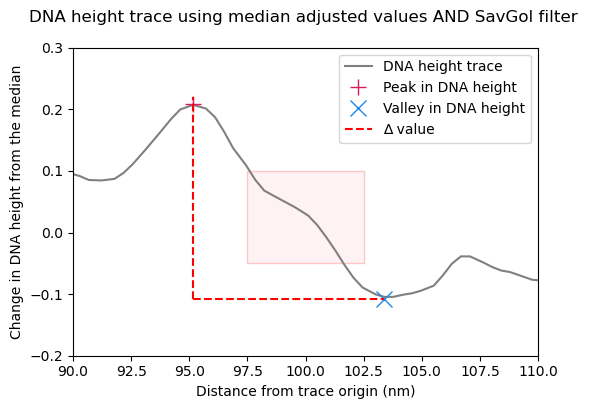

In [26]:
plt.figure(figsize = (6,4))
plt.plot(distances_in_nm, savgol_filter(savgol_med_adj_heights, 3,1), color = "grey", label = "DNA height trace")
#plt.plot(distances_in_nm[peaks[41:44]], (med_adj_heights[peaks[41:44]] - diff_peaks_valleys))
plt.plot(distances_in_nm[savgol_peaks[24]], savgol_med_adj_heights[savgol_peaks[24]], "+", color = "#D81B60", markersize = 12, label = "Peak in DNA height")
plt.plot(distances_in_nm[savgol_valleys[24]], savgol_med_adj_heights[savgol_valleys[24]], "x", color = "#1E88E5", markersize = 12, label = "Valley in DNA height")
#plt.xlim(min(distances_in_nm) - 10, max(distances_in_nm) + 10)
plt.ylim(-0.2, 0.3)
plt.xlim(90, 110)

plt.title("DNA height trace using median adjusted values AND SavGol filter \n ") ## you can split this title over several lines using " \n "
plt.ylabel("Change in DNA height from the median")
plt.xlabel("Distance from trace origin (nm)")

plt.vlines(95.164, med_adj_heights[savgol_valleys[24]], 0.22, color = "red", linestyle = "dashed", alpha = 1.0)
plt.hlines(med_adj_heights[savgol_valleys[24]], distances_in_nm[savgol_peaks[24]], distances_in_nm[savgol_valleys[24]], color = "red", linestyle = "dashed", alpha = 1.0, label = "∆ value")
highlight_box_2 = patches.Rectangle((97.5, -0.05), 5, 0.15, linewidth = 1, edgecolor = "red", facecolor = "pink", alpha=0.2)
plt.gca().add_patch(highlight_box_2)
'''
plt.vlines(99.55, med_adj_heights[valleys[42]], 0.058, color = "red", linestyle = "dotted", alpha = 0.75)
plt.hlines(med_adj_heights[valleys[42]], distances_in_nm[peaks[42]], distances_in_nm[valleys[42]], color = "red", linestyle = "dotted", alpha = 0.5)

plt.vlines(100.49, med_adj_heights[valleys[43]], 0.0167, color = "red", linestyle = "dotted", alpha = 0.75)
plt.hlines(med_adj_heights[valleys[43]], distances_in_nm[peaks[43]], distances_in_nm[valleys[43]], color = "red", linestyle = "dotted", alpha = 0.5)
'''
plt.legend(loc = "upper right")

In [27]:
## what it would be good to do here is work out the difference between the peak and valley in terms of nanometers to see how many points become ommitted...? This is akin to working out the rate of change of height...

height_threshold = 0.2
peak_vs_valley = round(savgol_med_adj_heights[savgol_peaks[24]] - (savgol_med_adj_heights[savgol_valleys[24]]),2)
if peak_vs_valley >= height_threshold:
    print("∆ peak vs. valley is", peak_vs_valley, "nm, therefore DOES EXCEED the height threshold of", height_threshold, "for a defect in the DNA")
else:
    print("∆ peak vs. valley is", peak_vs_valley, "and therefore DOES NOT EXCEED the height threshold of", height_threshold, "nm")

print(savgol_med_adj_heights[savgol_peaks[24]])
print(savgol_med_adj_heights[savgol_valleys[24]])

∆ peak vs. valley is 0.32 nm, therefore DOES EXCEED the height threshold of 0.2 for a defect in the DNA
0.20894325254054386
-0.10718811982305118


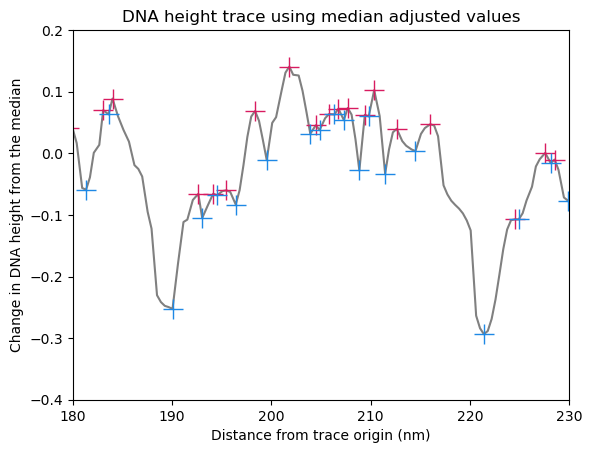

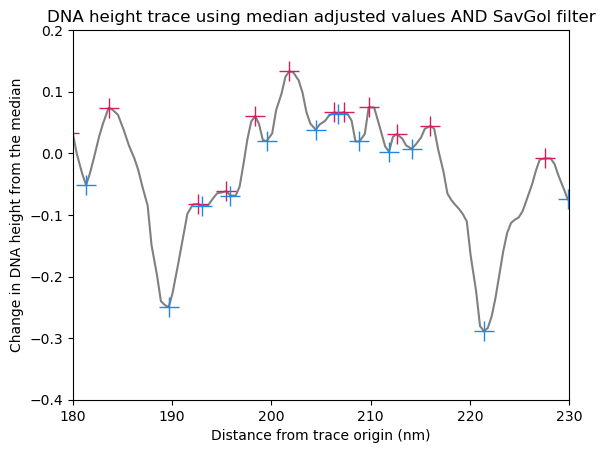

In [28]:
'''
Okay, okay... so this is 'cool' but I had another thought, if the trace goes down it has to come back
up so we could look at the area of the 'triangle' that is formed by the two adjacent peaks and the valley in between?
'''

## This is the same as the double plot above with the labelling boxes removed. I want to try and find differences between the heights of the peaks and valleys.

plt.plot(distances_in_nm, med_adj_heights, color = "grey")
plt.plot(distances_in_nm[peaks], med_adj_heights[peaks], "+", color="#D81B60", markersize = 14)
plt.plot(distances_in_nm[valleys], med_adj_heights[valleys], "+", color="#1E88E5", markersize = 14)
plt.xlim(min(distances_in_nm) - 10, max(distances_in_nm) + 10)
plt.ylim(-0.4, 0.2)
plt.xlim(180, 230)
plt.title("DNA height trace using median adjusted values")
plt.ylabel("Change in DNA height from the median")
plt.xlabel("Distance from trace origin (nm)")
plt.show()

plt.plot(distances_in_nm, savgol_med_adj_heights, color = "grey")
plt.plot(distances_in_nm[savgol_peaks], savgol_med_adj_heights[savgol_peaks], "+", color="#D81B60", markersize = 14)
plt.plot(distances_in_nm[savgol_valleys], savgol_med_adj_heights[savgol_valleys], "+", color="#1E88E5", markersize = 14)
plt.xlim(min(distances_in_nm) - 10, max(distances_in_nm) + 10)
plt.ylim(-0.4, 0.2)
plt.xlim(180, 230)
plt.title("DNA height trace using median adjusted values AND SavGol filter")
plt.ylabel("Change in DNA height from the median")
plt.xlabel("Distance from trace origin (nm)")
plt.show()

## look at these graphs right, you can see that the valley on the right would make a decent isosceles triangle
## once the SavGol filter has been applied which would separate it from the left hand side valley...


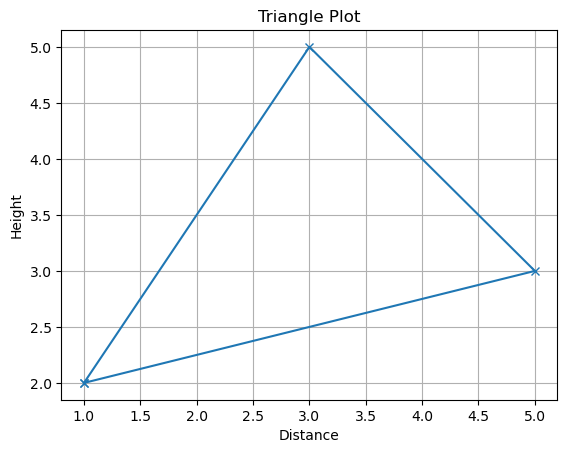

NameError: name 'w' is not defined

In [52]:
# Define the coordinates of the triangle vertices
x = [1, 3, 5]  # X-coordinates of the vertices
y = [2, 5, 3]  # Y-coordinates of the vertices

# Plot the lines between the vertices to form the triangle
plt.plot(x + [x[0]], y + [y[0]], marker='x')  # Connect last point to first point to close the triangle

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Height')
plt.title('Triangle Plot')

# Display the plot
plt.grid(True)
plt.show()


w## whatever


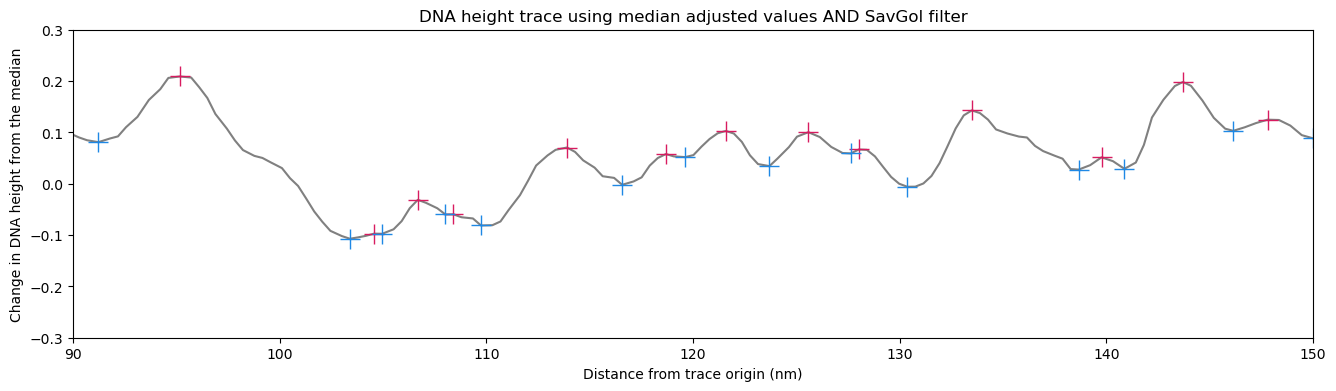

In [86]:
plt.figure(figsize =  (16,4))
plt.plot(distances_in_nm, savgol_med_adj_heights, color = "grey")
plt.plot(distances_in_nm[savgol_peaks], savgol_med_adj_heights[savgol_peaks], "+", color="#D81B60", markersize = 14)
plt.plot(distances_in_nm[savgol_valleys], savgol_med_adj_heights[savgol_valleys], "+", color="#1E88E5", markersize = 14)
#plt.plot(distances_in_nm[savgol_peaks[24]] + savgol_med_adj_heights[savgol_peaks[24]], distances_in_nm[savgol_valleys[24]] + savgol_med_adj_heights[savgol_valleys[24]], color = "red", linewidth = 2)
plt.ylim(-0.3, 0.3)
plt.xlim(90, 150)
plt.title("DNA height trace using median adjusted values AND SavGol filter")
plt.ylabel("Change in DNA height from the median")
plt.xlabel("Distance from trace origin (nm)")
plt.show()



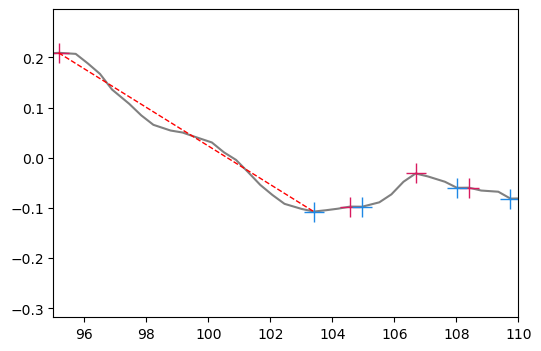

'"\nprint(distances_in_nm[savgol_peaks[24]])\nprint(savgol_med_adj_heights[savgol_peaks[24]])\nprint(distances_in_nm[savgol_valleys[24]])\nprint(savgol_med_adj_heights[savgol_valleys[24]])\n#plt.plot([95] + [103], [0.2] + [-0.1])\n#plt.show()\n'

In [88]:
plt.figure(figsize =  (6,4))
plt.plot(distances_in_nm, savgol_med_adj_heights, color = "grey")
plt.plot(distances_in_nm[savgol_peaks], savgol_med_adj_heights[savgol_peaks], "+", color="#D81B60", markersize = 14)
plt.plot(distances_in_nm[savgol_valleys], savgol_med_adj_heights[savgol_valleys], "+", color="#1E88E5", markersize = 14)
# what you are doing here is using the index of the heigts and valleys to draw a connecting line between the peak and adjacent valley.
plt.plot([distances_in_nm[savgol_peaks[24]]] + 
         [distances_in_nm[savgol_valleys[24]]], 
         [savgol_med_adj_heights[savgol_peaks[24]]] + 
         [savgol_med_adj_heights[savgol_valleys[24]]], 
         color = "red", 
         linestyle = "dashed",
         linewidth = 1)
plt.xlim(95, 110)
plt.show()

""""
print(distances_in_nm[savgol_peaks[24]])
print(savgol_med_adj_heights[savgol_peaks[24]])
print(distances_in_nm[savgol_valleys[24]])
print(savgol_med_adj_heights[savgol_valleys[24]])
#plt.plot([95] + [103], [0.2] + [-0.1])
#plt.show()
"""

# this works nicely, lets try and find a good vally that returns to above median height (ish) and draw a proper triangle and see if its possible to calculate the area.
# there is one around 210 to 230 nm in this molecule.

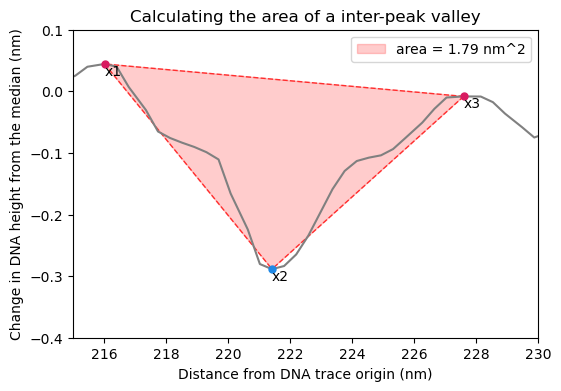

In [197]:
plt.figure(figsize =  (6,4))
plt.xlim(215, 230)
plt.ylim(-0.4, 0.1)

# plot peak to valley. You haven't found thus automatically, you've searched for it manually which is gross.

plt.plot([distances_in_nm[savgol_peaks[52]]] + 
         [distances_in_nm[savgol_valleys[52]]], 
         [savgol_med_adj_heights[savgol_peaks[52]]] + 
         [savgol_med_adj_heights[savgol_valleys[52]]], 
         color = "red", 
         linestyle = "dashed",
         linewidth = 1,
         alpha = 0.75)
plt.text(distances_in_nm[savgol_peaks[52]], savgol_med_adj_heights[savgol_peaks[52]], 'x1', verticalalignment = 'top')

plt.plot([distances_in_nm[savgol_peaks[53]]] + 
         [distances_in_nm[savgol_valleys[52]]], 
         [savgol_med_adj_heights[savgol_peaks[53]]] + 
         [savgol_med_adj_heights[savgol_valleys[52]]], 
         color = "red", 
         linestyle = "dashed",
         linewidth = 1,
         alpha = 0.75)
plt.text(distances_in_nm[savgol_peaks[53]], savgol_med_adj_heights[savgol_peaks[53]], 'x3', verticalalignment = 'top')

plt.plot([distances_in_nm[savgol_peaks[53]]] + 
         [distances_in_nm[savgol_peaks[52]]], 
         [savgol_med_adj_heights[savgol_peaks[53]]] + 
         [savgol_med_adj_heights[savgol_peaks[52]]], 
         color = "red", 
         linestyle = "dashed",
         linewidth = 1,
         alpha = 0.75)
plt.text(distances_in_nm[savgol_valleys[52]], savgol_med_adj_heights[savgol_valleys[52]], 'x2', verticalalignment = 'top')

plt.plot(distances_in_nm, savgol_med_adj_heights, color = "grey")
plt.plot(distances_in_nm[savgol_peaks[52]], savgol_med_adj_heights[savgol_peaks[52]], ".", color = "#D81B60", markersize = 10)
plt.plot(distances_in_nm[savgol_peaks[53]], savgol_med_adj_heights[savgol_peaks[53]], ".", color = "#D81B60", markersize = 10)
plt.plot(distances_in_nm[savgol_valleys[52]], savgol_med_adj_heights[savgol_valleys[52]], ".", color = "#1E88E5", markersize = 10)
plt.fill(x_array, y_array, color = "red", alpha =0.2, label = f"area = {(area_of_valley):.2f} nm^2")

##f"Median height of DNA = {stats.median(heights_in_nm):.2f}

plt.title("Calculating the area of a inter-peak valley")
plt.ylabel("Change in DNA height from the median (nm)")
plt.xlabel("Distance from DNA trace origin (nm)")
plt.legend()

plt.show()

## aveneer next.

## algorithm behind scar detection - detecting sharp incrase and decrease immediately after. 


In [187]:
## calculating the area of a triangle from coordinates

'''
the formula for the area of a triangle (from coordinates) is 1/2(x1(y2 - y3) + x2(y3 - y1) + x3(y1 - y2))



these are the coordiante points for x1, x2 and x3.

plt.text(distances_in_nm[savgol_peaks[52]], savgol_med_adj_heights[savgol_peaks[52]], 'x1', verticalalignment = 'top')
plt.text(distances_in_nm[savgol_valleys[52]], savgol_med_adj_heights[savgol_valleys[52]], 'x2', verticalalignment = 'top')
plt.text(distances_in_nm[savgol_peaks[53]], savgol_med_adj_heights[savgol_peaks[53]], 'x3', verticalalignment = 'top')

'''

x1 = distances_in_nm[savgol_peaks[52]]
x2 = distances_in_nm[savgol_valleys[52]]
x3 = distances_in_nm[savgol_peaks[53]]

y1 = savgol_med_adj_heights[savgol_peaks[52]]
y2 = savgol_med_adj_heights[savgol_valleys[52]]
y3 = savgol_med_adj_heights[savgol_peaks[53]]

## lets smash these in an array for later funtimes.

x_array = [x1, x2, x3]
y_array = [y1, y2, y3]

print(x1,x2,x3,y1,y2,y3)



area_of_valley = 0.5 * np.absolute(x1 * (y2 - y3) + (x2 * (y3 - y1)) + (x3 * (y1 - y2)))          

## learnt here that you have to make sure that you add the multiplication signs (*) into the formula of python thinks you're trying to use them as functions.
## secondly, and silly-ly you are using very small and negative numbers here to calculate the area which will be messing something up. 

print("The area of the valley is:", area_of_valley, "nm^2")

216.01644220353688 221.4181715491409 227.60115089474488 0.044415559641704405 -0.2886595698705197 -0.008250991188010204
The area of the valley is: 1.7870439472684367 nm^2


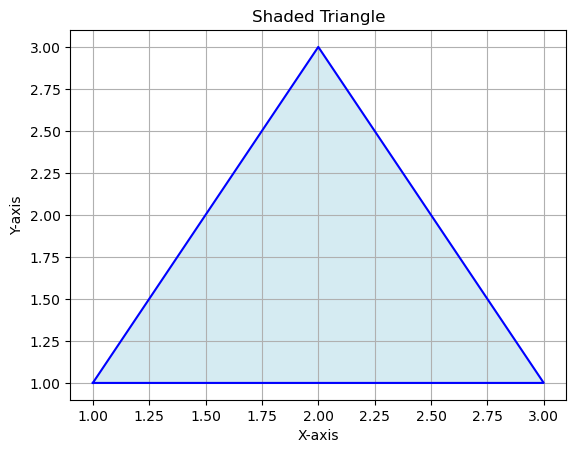

In [183]:
# Define the vertices of the triangle
x = [1, 3, 2]  # x-coordinates of the vertices
y = [1, 1, 3]  # y-coordinates of the vertices

# Plot the triangle
plt.plot(x + [x[0]], y + [y[0]], color='blue')  # Connect the last vertex to the first to close the triangle

# Shade the triangle
plt.fill(x, y, color='lightblue', alpha=0.5)  # Fill the area inside the triangle with light blue color and 50% transparency

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Shaded Triangle')

plt.grid(True)
plt.show()
